In [1]:
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("../input/twitter-impact1/Twitter.csv")

In [3]:
data.head(1)

,Unnamed: 0,Id,Post Contet,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Media Type,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact
0,41370,6d967b125fcecba6357dbc43f8f380cf2d6d7a51,Sana all na lang.,0.0,17.0,0.0,0.0,1660.0,133.0,0,TEXT,2021-01-28 12:17:24+00:00,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.drop(['Unnamed: 0', "Id","Post Contet","Published DateTime"], inplace=True, axis=1)

In [5]:
X = data.iloc[:, :13]
X.head()

,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Media Type,Mentions Count,Post author verified,Likes,Shares,Comments
0,0.0,17.0,0.0,0.0,1660.0,133.0,0,TEXT,0.0,0.0,0.0,0.0,0.0
1,19.3,84.0,0.0,1.0,318924.0,1428273.0,5454,TEXT,0.0,1.0,10.0,1.0,0.0
2,0.0,78.0,0.0,0.0,39976.0,1560.0,0,TEXT,0.0,0.0,0.0,0.0,0.0
3,0.0,284.0,2.0,0.0,8045.0,27191.0,26,TEXT,0.0,1.0,460.0,219.0,4.0
4,-20.0,80.0,0.0,1.0,210996.0,2385.0,0,IMAGE,0.0,0.0,0.0,0.0,0.0


In [6]:
y = data.iloc[:, 13:]
y.head()

,Impact
0,0.0
1,110.0
2,0.0
3,6830.0
4,0.0


In [7]:
#algorithm
l_reg = linear_model.LinearRegression()

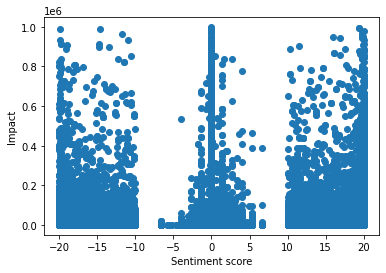

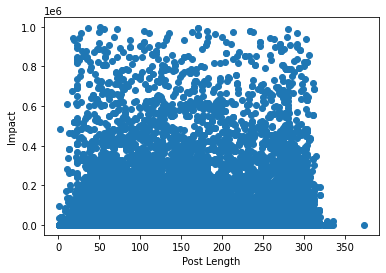

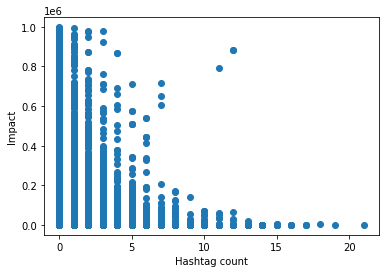

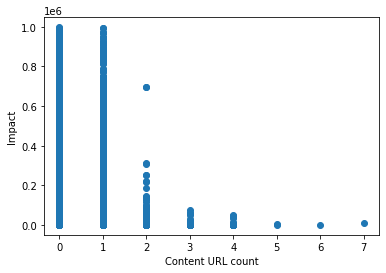

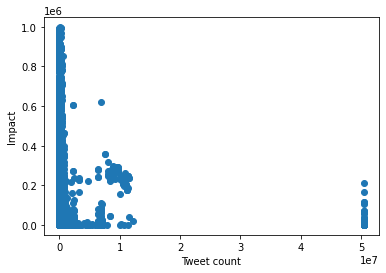

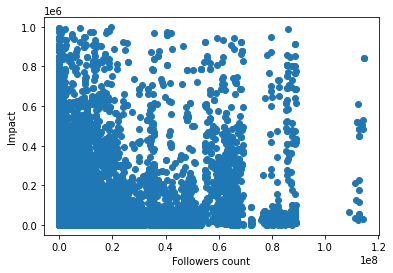

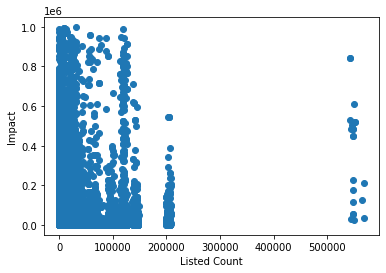

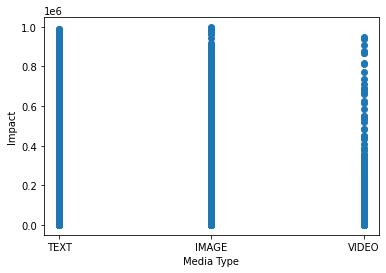

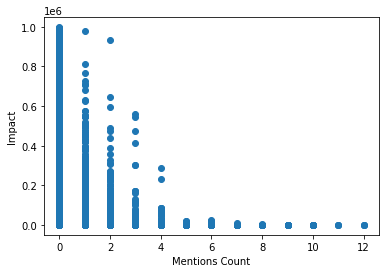

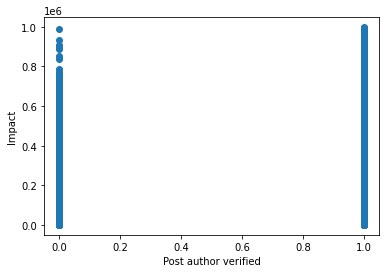

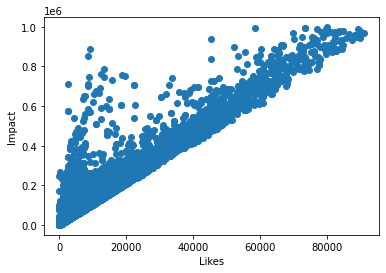

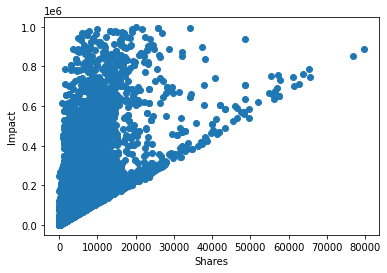

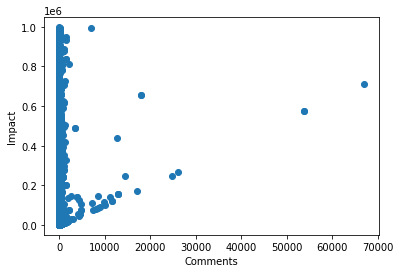

In [8]:
for i in X.columns:
    plt.scatter(X[i], y)
    plt.xlabel(i)
    plt.ylabel("Impact")
    plt.show()

In [9]:
 X["Media Type"]

0         TEXT
1         TEXT
2         TEXT
3         TEXT
4        IMAGE
         ...  
49995     TEXT
49996     TEXT
49997     TEXT
49998    IMAGE
49999    IMAGE
Name: Media Type, Length: 50000, dtype: object

In [10]:
X = pd.get_dummies(X, columns = ['Media Type'])
X.head()

,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Mentions Count,Post author verified,Likes,Shares,Comments,Media Type_IMAGE,Media Type_TEXT,Media Type_VIDEO
0,0.0,17.0,0.0,0.0,1660.0,133.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,19.3,84.0,0.0,1.0,318924.0,1428273.0,5454,0.0,1.0,10.0,1.0,0.0,0,1,0
2,0.0,78.0,0.0,0.0,39976.0,1560.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0
3,0.0,284.0,2.0,0.0,8045.0,27191.0,26,0.0,1.0,460.0,219.0,4.0,0,1,0
4,-20.0,80.0,0.0,1.0,210996.0,2385.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0


In [11]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
X_train

array([[ 1.04258478,  1.66004969,  0.23198811, ..., -0.73141407,
        -1.2337728 ,  4.45541344],
       [-1.64027056, -0.59030562, -0.51042136, ..., -0.73141407,
         0.810522  , -0.22444606],
       [-0.10241955,  0.82564828, -0.51042136, ..., -0.73141407,
         0.810522  , -0.22444606],
       ...,
       [-1.27233611, -0.69144518, -0.51042136, ...,  1.36721461,
        -1.2337728 , -0.22444606],
       [-0.10241955, -0.37538404,  1.71680706, ...,  1.36721461,
        -1.2337728 , -0.22444606],
       [-1.10657398,  0.64865405, -0.51042136, ..., -0.73141407,
         0.810522  , -0.22444606]])

In [14]:
#Train
model = l_reg.fit(X_train, y_train)

In [15]:
y_pred = model.predict(X_test)
print("Predictions  :", y_pred)
print("R^2 value: ", l_reg.score(X,y))

Predictions  : [[-0.3882534 ]
 [-0.25087294]
 [-0.01628923]
 ...
 [-0.38669847]
 [ 8.65286242]
 [-0.3882538 ]]
R^2 value:  0.999999995375256
